# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [51]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [52]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.8',
    'mlxtend': '0.19.0'
}
check_packages(d)

[OK] numpy 1.24.3
[OK] matplotlib 3.5.1
[OK] torch 2.5.1+cpu
[OK] mlxtend 0.23.1


# Chapter 13: Going Deeper -- the Mechanics of PyTorch (Part 1/3)

**Outline**

- [The key features of PyTorch](#The-key-features-of-PyTorch)
- [PyTorch's computation graphs](#PyTorchs-computation-graphs)
  - [Understanding computation graphs](#Understanding-computation-graphs)
  - [Creating a graph in PyTorch](#Creating-a-graph-in-PyTorch)
- [PyTorch tensor objects for storing and updating model parameters](#PyTorch-tensor-objects-for-storing-and-updating-model-parameters)
- [Computing gradients via automatic differentiation](#Computing-gradients-via-automatic-differentiation)
  - [Computing the gradients of the loss with respect to trainable variables](#Computing-the-gradients-of-the-loss-with-respect-to-trainable-variables)
  - [Understanding automatic differentiation](#Understanding-automatic-differentiation)
  - [Adversarial examples](#Adversarial-examples)
- [Simplifying implementations of common architectures via the torch.nn module](#Simplifying-implementations-of-common-architectures-via-the-torch.nn-module)
  - [Implementing models based on nn.Sequential](#Implementing-models-based-on-nn-Sequential)
  - [Choosing a loss function](#Choosing-a-loss-function)
  - [Solving an XOR classification problem](#Solving-an-XOR-classification-problem)
  - [Making model building more flexible with nn.Module](#Making-model-building-more-flexible-with-nn.Module)
  - [Writing custom layers in PyTorch](#Writing-custom-layers-in-PyTorch)
- [Summary](#summary)

In [53]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
# notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image
%matplotlib inline

## The key features of PyTorch

## PyTorch's computation graphs

### Understanding computation graphs



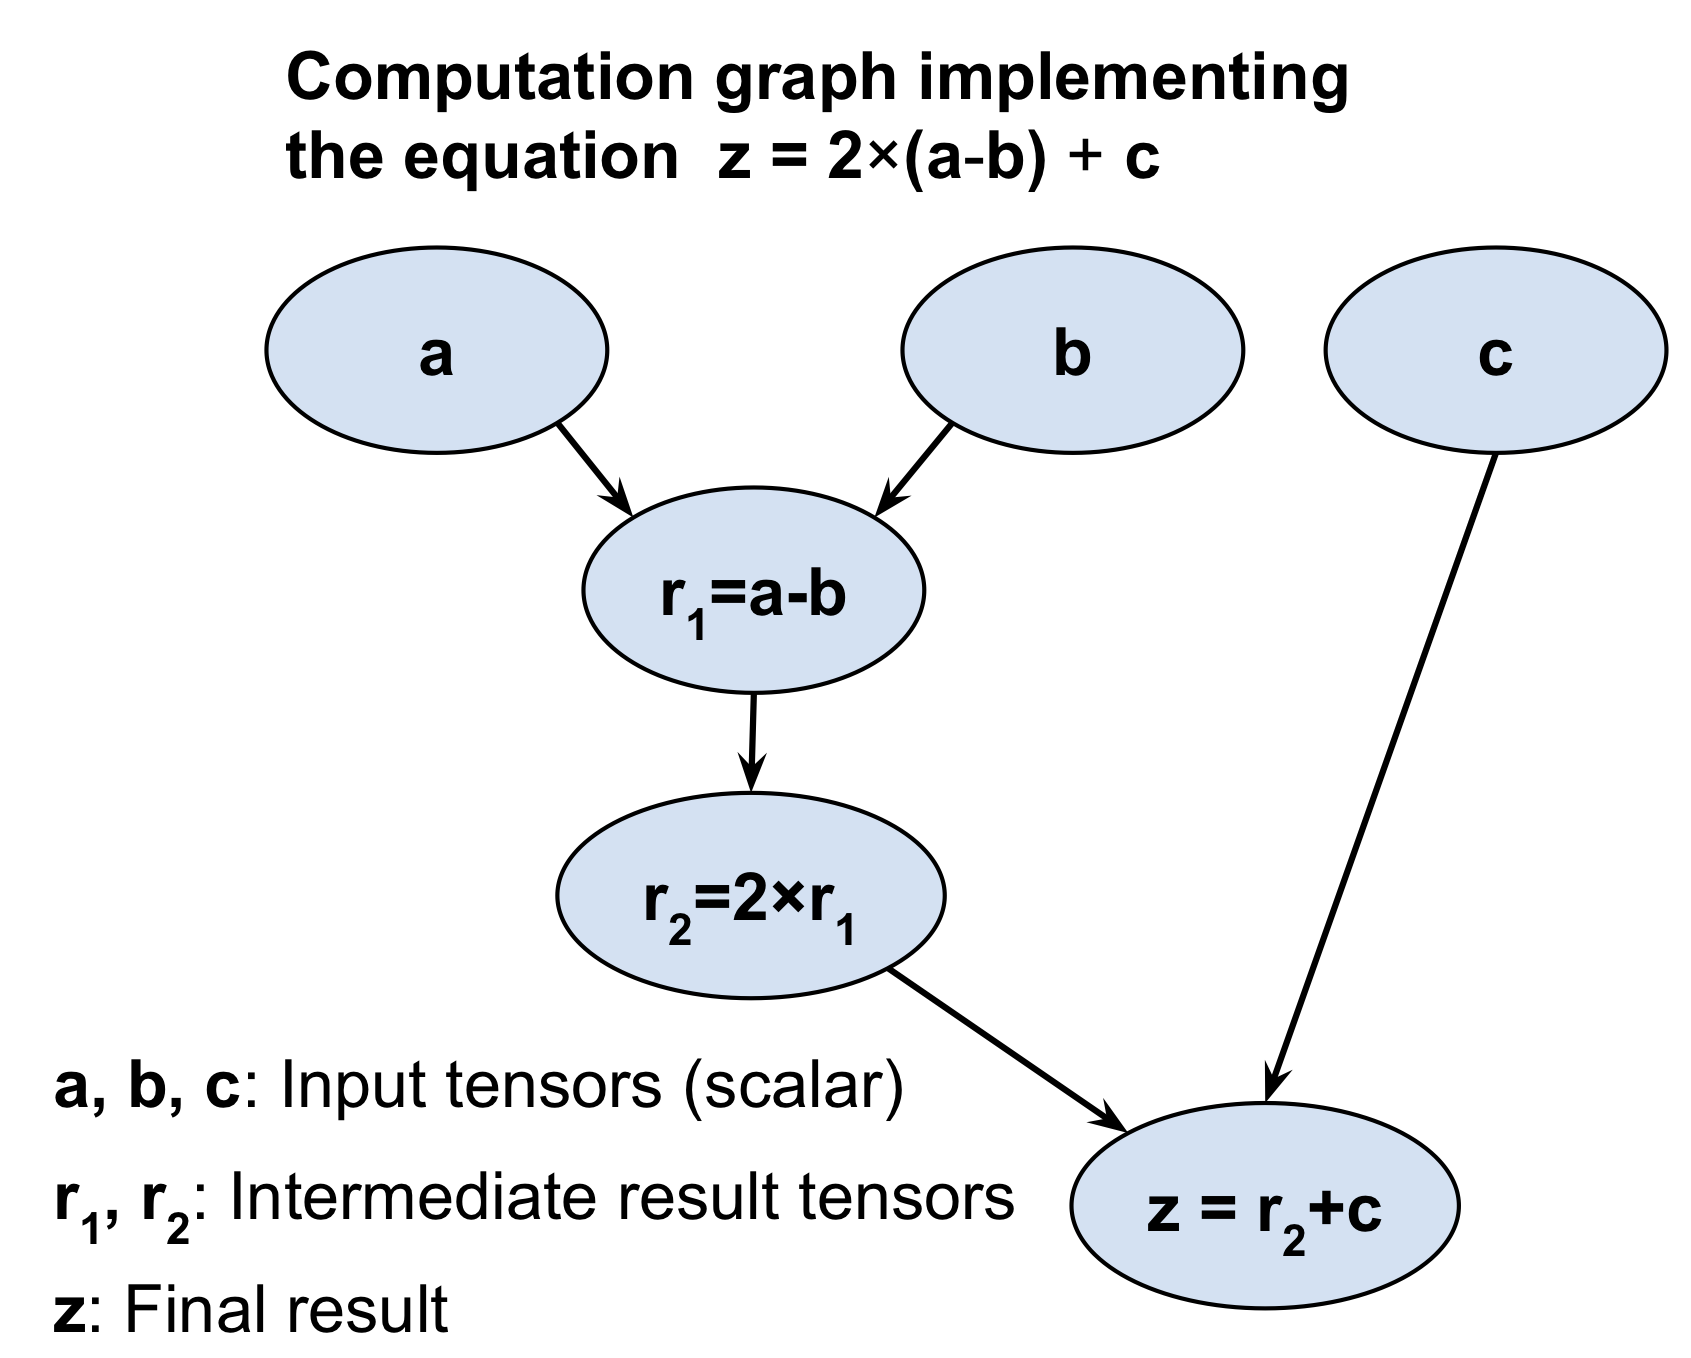

In [54]:
# * Image(...)
# Use the Image class (probably imported from IPython.display, as in the previous example) 
# to display an image in an interactive environment such as Jupyter Notebook.
# * filename='./figures/13_01.png'
# Specifies the path of the image to display. In this case, the image is located in the
# file './figures/13_01.png', which is a relative path to the current directory.
# * width=400
# Set the image width to 400 pixels. This resizes the image so that it occupies that 
# space width, while its height is adjusted proportionally (if you do not specify a 
# height).

Image(filename='figures/13_01.png', width=400)

### Creating a graph in PyTorch



Let’s look at a simple example that illustrates how to create a graph in PyTorch for evaluating
z = 2 × (a – b) + c, as shown in the previous figure. The variables a, b, and c are scalars (single numbers),
and we define these as PyTorch tensors. To create the graph, we can simply define a regular Python
function with a, b, and c as its input arguments, for example:

In [55]:
import torch
def compute_z(a, b, c):
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    return z

Now, to carry out the computation, we can simply call this function with tensor objects as function
arguments. Note that PyTorch functions such as add, sub (or subtract), and mul (or multiply) also
allow us to provide inputs of higher ranks in the form of a PyTorch tensor object. In the following code
example, we provide scalar inputs (rank 0), as well as rank 1 and rank 2 inputs, as lists:

In [56]:
print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))

Scalar Inputs: tensor(1)


In [57]:
print('Rank 1 Inputs:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))

Rank 1 Inputs: tensor([1])


In [58]:
print('Rank 2 Inputs:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

Rank 2 Inputs: tensor([[1]])


## PyTorch Tensor objects for storing and updating model parameters

In the following code, we will generate tensor objects of type float32:

In [59]:
a = torch.tensor(3.14, requires_grad=True)
print(a)

tensor(3.1400, requires_grad=True)


In [60]:
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True) 
print(b)

tensor([1., 2., 3.], requires_grad=True)


Notice that requires_grad is set to False by default. This value can be efficiently set to True by running requires_grad_().

In [61]:
a.requires_grad

True

Let’s take a look at the following example:

In [62]:
w = torch.tensor([1.0, 2.0, 3.0])
print(w.requires_grad)

False


In [63]:
w.requires_grad_()
print(w.requires_grad)

True


So, let’s look at how we can create a tensor with Glorot initialization, which is a classic random initialization scheme that was proposed by Xavier Glorot and Yoshua Bengio. For this, we first create an empty tensor and an operator called init as an object of class GlorotNormal. Then, we fill this tensor with values according to the Glorot initialization by calling the xavier_normal_() method. In the following example, we initialize a tensor of shape 2×3:

In [64]:
import torch.nn as nn
torch.manual_seed(1)
w = torch.empty(2, 3)
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


Now, to put this into the context of a more practical use case, let’s see how we can define two Tensor
objects inside the base nn.Module class:

In [65]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)

## Computing gradients via automatic differentiation and GradientTape


### Computing the gradients of the loss with respect to trainable variables

Let’s work with a simple example where we will compute z = wx + b and define the loss as the squared loss between the target y and prediction z, Loss = (y – z)². In the more general case, where we may have multiple predictions and targets, we compute the loss as the sum of the squared error, Loss = ∑𝑖(y𝑖 − z𝑖)².

In order to implement this computation in PyTorch, we will define the model parameters, w and b, as variables (tensors with the requires_gradient attribute set to True), and the input, x and y, as default tensors. We will compute the loss tensor and use it to compute the gradients of the model parameters, w and b, as follows:

In [66]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True) 
x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w, x), b)
loss = (y-z).pow(2).sum()
loss.backward()
print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

dL/dw :  tensor(-0.5600)
dL/db :  tensor(-0.4000)


In [67]:
# verifying the computed gradient dL/dw
print(2 * x * ((w * x + b) - y))

tensor([-0.5600], grad_fn=<MulBackward0>)


## Simplifying implementations of common architectures via the torch.nn module



### Implementing models based on nn.Sequential

In the following example, we will build a model with two densely (fully) connected layers:

In [68]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

#### Configuring layers

 * Initializers `nn.init`: https://pytorch.org/docs/stable/nn.init.html 
 * L1 Regularizers `nn.L1Loss`: https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
 * L2 Regularizers `weight_decay`: https://pytorch.org/docs/stable/optim.html
 * Activations: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity  
 

In the following code example, we will configure the first fully connected layer by specifying the initial value distribution for the weight. Then, we will configure the second fully connected layer by computing the L1 penalty term for the weight matrix:

In [69]:
nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()

Here, we initialized the weight of the first linear layer with Xavier initialization. And we computed the L1 norm of the weight of the second linear layer.

#### Compiling a model

 * Optimizers `torch.optim`:  https://pytorch.org/docs/stable/optim.html#algorithms
 * Loss Functions `tf.keras.losses`: https://pytorch.org/docs/stable/nn.html#loss-functions

In this example, we will use the SGD optimizer, and cross-entropy loss for binary classification:

In [70]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Solving an XOR classification problem

We will use half of the data (100 training examples) for training and the remaining half for validation.

The code for generating the data and splitting it into the training and validation datasets is as follows:

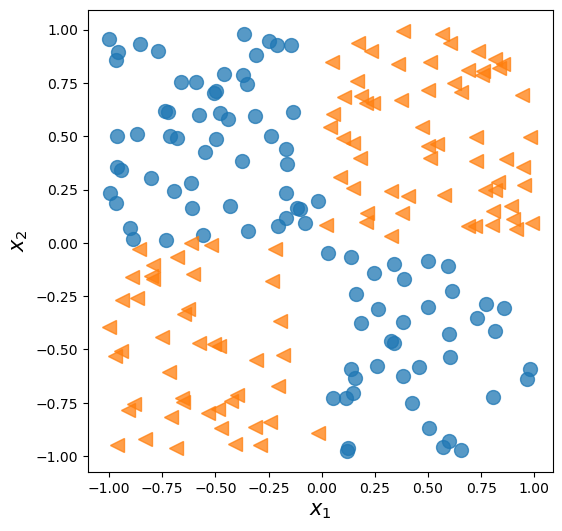

In [71]:
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
# plt.savefig('figures/13_02.png', dpi=300)
plt.show()

As a general rule of thumb, the more layers we have, and the more neurons we have in each layer, the larger the capacity of the model will be. Here, the model capacity can be thought of as a measure of how readily the model can approximate complex functions. While having more parameters means the network can fit more complex functions, larger models are usually harder to train (and prone to overfitting). In practice, it is always a good idea to start with a simple model as a baseline, for example, a single-layer NN like logistic regression:

In [72]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

After defining the model, we will initialize the cross-entropy loss function for binary classification and the SGD optimizer:

In [73]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Next, we will create a data loader that uses a batch size of 2 for the train data:

In [74]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Now we will train the model for 200 epochs and record a history of training epochs:

In [75]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
           accuracy_hist_train, accuracy_hist_valid
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Notice that the history of training epochs includes the train loss and validation loss and the train accuracy and validation accuracy, which is useful for visual inspection after training. In the following code, we will plot the learning curves, including the training and validation loss, as well as their accuracies.

The following code will plot the training performance:

Text(0.5, 0, 'Epochs')

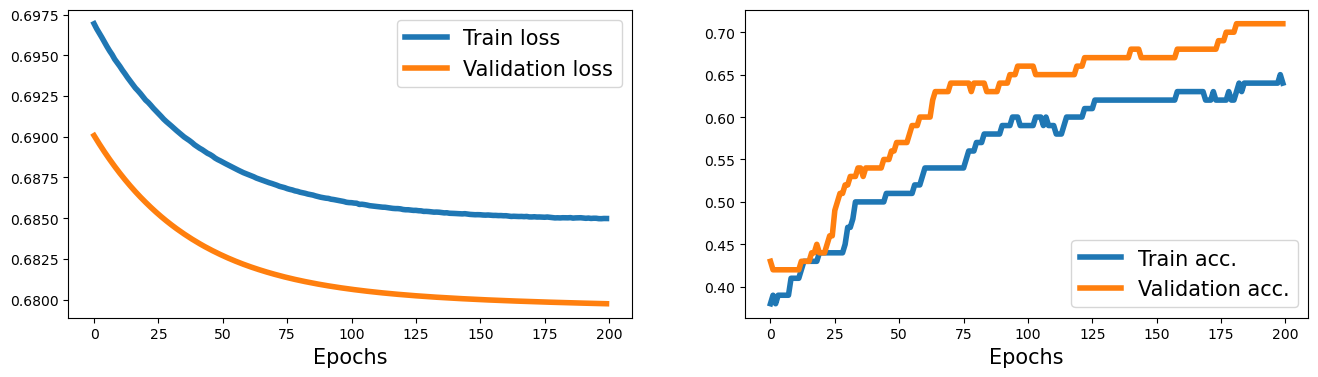

In [76]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
# plt.savefig('figures/13_03.png', dpi=300)

In the following example, we will take a look at the results of a feedforward NN with two hidden layers:

In [77]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [78]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

We can repeat the previous code for visualization, which produces the following:

Text(0.5, 0, 'Epochs')

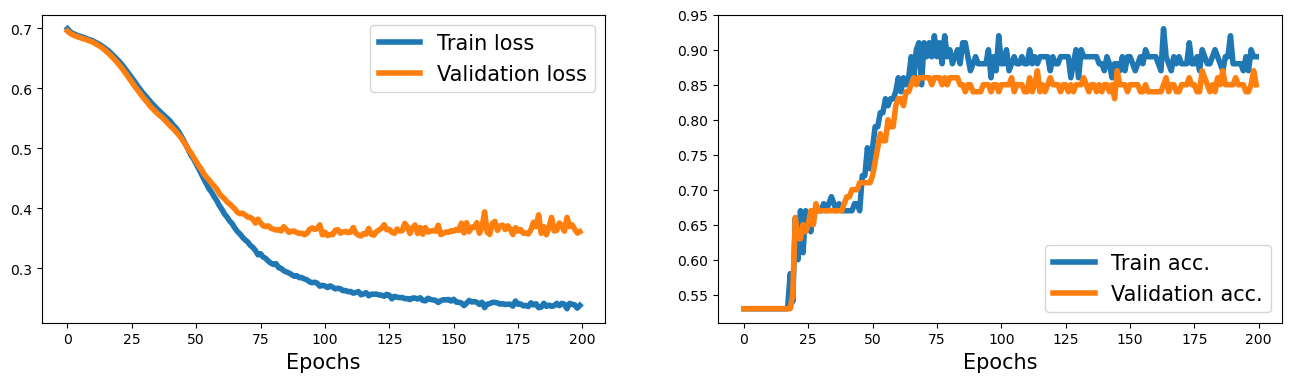

In [79]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
# plt.savefig('figures/13_04.png', dpi=300)

Now, we can see that the model is able to derive a nonlinear decision boundary for this data, and the model reaches 100 percent accuracy on the training dataset. The validation dataset’s accuracy is 95 percent, which indicates that the model is slightly overfitting.

## Making model building more flexible with nn.Module



The alternative way to build complex models is by subclassing nn.Module. In this approach, we create a new class derived from nn.Module and define the method, __init__(), as a constructor. The forward() method is used to specify the forward pass. In the constructor function, __init__(), we define the layers as attributes of the class so that they can be accessed via the self reference attribute. Then, in the forward() method, we specify how these layers are to be used in the forward pass of the NN. The code for defining a new class that implements the previous model is as follows:

In [80]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

To compute the decision boundary of our model, we need to add a predict() method in the MyModule class. It will return the predicted class (0 or 1) for a sample.

Notice that we put all layers in the nn.ModuleList object, which is just a list object composed of nn.Module items. This makes the code more readable and easier to follow.

Once we define an instance of this new class, we can train it as we did previously:

In [81]:
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [82]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

In [83]:
# ! pip install mlxtend

The following code will plot the training performance along with the decision region bias:

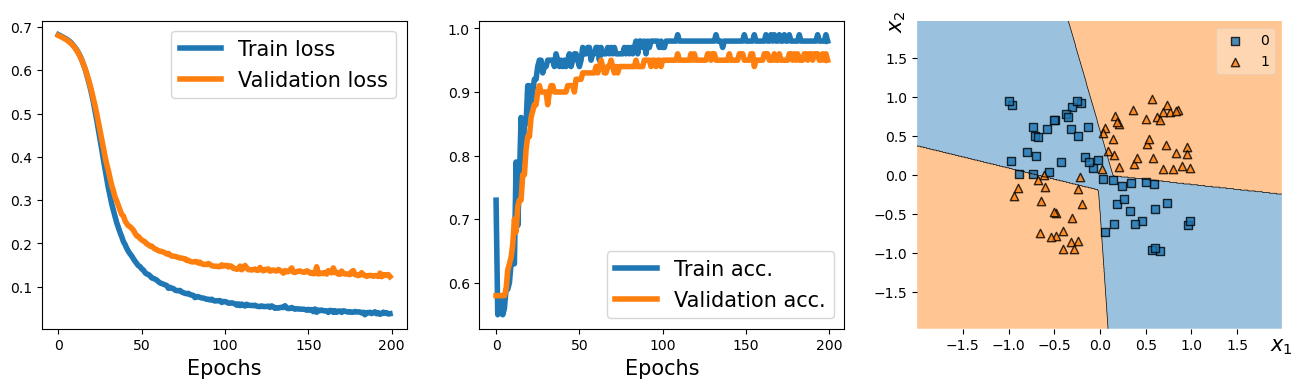

In [84]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('figures/13_05.png', dpi=300)
plt.show()

## Writing custom layers in PyTorch


To look at a concrete example, we are going to define a new layer called NoisyLinear, which implements the computation 
w * (x + e) + b, which was mentioned in the preceding paragraph:

In [85]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter is a Tensor 
                                  # that's a module parameter
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev

    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)   

In the constructor, we have added an argument, noise_stddev, to specify the standard deviation for the distribution of e, which is sampled from a Gaussian distribution. Furthermore, notice that in the forward() method, we have used an additional argument, training=False. We use it to distinguish whether the layer is used during training or only for prediction (this is sometimes also called inference) or evaluation. Also, there are certain methods that behave differently in training and prediction modes. You will encounter an example of such a method, Dropout, in the upcoming chapters. In the previous code snippet, we also specified that the random vector, e , was to be generated and added to the input during training only and not used for inference or evaluation.

Before we go a step further and use our custom NoisyLinear layer in a model, let’s test it in the context of a simple example.

1. In the following code, we will define a new instance of this layer, and execute it on an input tensor. Then, we will call the layer three times on the same input tensor:

In [86]:
torch.manual_seed(1)
noisy_layer = NoisyLinear(4, 2)
x = torch.zeros((1, 4))

In [87]:
print(noisy_layer(x, training=True))

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)


In [88]:
print(noisy_layer(x, training=True))

tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)


In [89]:
print(noisy_layer(x, training=False))

tensor([[0., 0.]], grad_fn=<AddBackward0>)


2. Now, let’s create a new model similar to the previous one for solving the XOR classification task. As before, we will use the nn.Module class for model building, but this time, we will use our NoisyLinear layer as the first hidden layer of the multilayer perceptron. The code is as follows:

In [90]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
        
    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

3. Similarly, we will train the model as we did previously. At this time, to compute the prediction on the training batch, we use pred = model(x_batch, True)[:, 0] instead of pred = model(x_batch)[:, 0]:

In [91]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
torch.manual_seed(1)
loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_hist_train[epoch] += is_correct.mean()
    loss_hist_train[epoch] /= 100/batch_size
    accuracy_hist_train[epoch] /= 100/batch_size
    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

4. After the model is trained, we can plot the losses, accuracies, and the decision boundary:

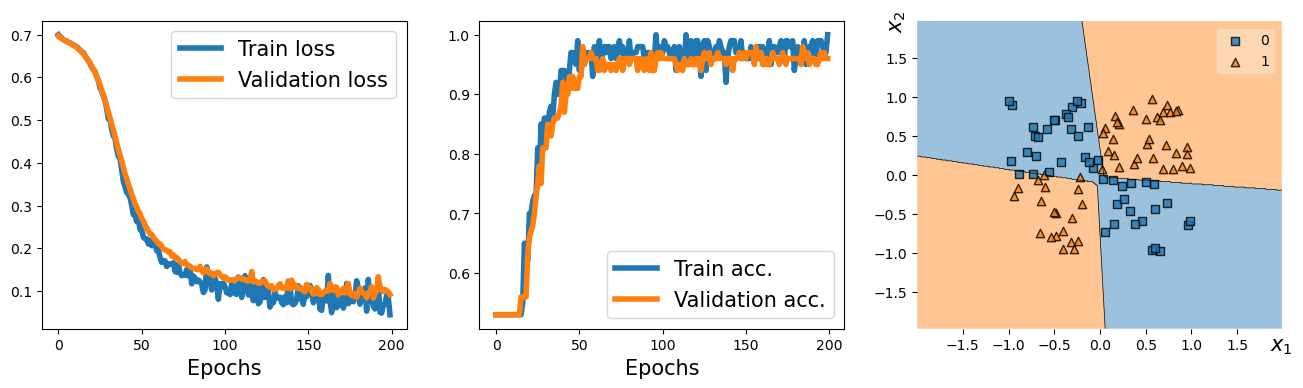

In [92]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('figures/13_06.png', dpi=300)
plt.show()

# Summary

---

Readers may ignore the next cell.

In [93]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ch13_part1.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ch13_part1.ipynb.
# * --output ch13_part1.py
# This option tells the script to save the output (the converted file) with the name
# ch13_part1.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ch13_part1.ipynb --output ch13_part1.py

[NbConvertApp] Converting notebook ch13_part1.ipynb to script
[NbConvertApp] Writing 25872 bytes to ch13_part1.py
